## Imports and Setup

In [2]:
!pip install textblob

import pandas as pd
import numpy as np
import sklearn
import requests
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import seaborn as sns
import textblob
#from wordcloud import WordCloud
from pathlib import Path
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score

import pickle
import re
import time
import datetime                              # access to %%time, for timing individual notebook cells
import os
from PIL import Image
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

%matplotlib inline
%config InlineBackend.figure_format='retina'

# Use 'seaborn-v0_8' instead of 'seaborn'
plt.style.use('seaborn-v0_8')  # This line is changed to use a valid seaborn style
plt.rcParams["figure.figsize"] = (15,10)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd

# Define file path
file_path = "/content/drive/MyDrive/ITS RESEARCH/HALAL_ITS/DATASET/RGBI/moneyspent_cleaned.xlsx"

# Read the Excel file
df_review_moneyspent = pd.read_excel(file_path)

# Display the first few rows
df_review_moneyspent.head()


,no,money_spent,username,msme,review,batas_bawah,batas_atas,median,rating
0,1,0-25000,Ilungg,Bakso Eko,tidak ada transcript,0,25000,12500,5
1,2,0-25000,Fareldanendraa,Bakso Eko,baksonya enak,0,25000,12500,5
2,3,0-25000,irfanalmizan,Bakso Eko,baksonya enak abis,0,25000,12500,5
3,4,0-25000,ryanadiputrapratama,Bakso Eko,tidak ada transcript,0,25000,12500,5
4,5,0-25000,dwmhr,Bakso Eko,baksonya sangat enak,0,25000,12500,5


In [5]:
df_review_moneyspent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   no           72 non-null     int64 
 1   money_spent  72 non-null     object
 2   username     72 non-null     object
 3   msme         72 non-null     object
 4   review       72 non-null     object
 5   batas_bawah  72 non-null     int64 
 6   batas_atas   72 non-null     int64 
 7   median       72 non-null     int64 
 8   rating       72 non-null     int64 
dtypes: int64(5), object(4)
memory usage: 5.2+ KB


In [6]:
print(df_review_moneyspent.msme.unique())
print(df_review_moneyspent.username.unique())
print("Lapak yang dilakukan review ada sebanyak: ", df_review_moneyspent.msme.nunique())
print("User yang melakukan review ada sebanyak: ", df_review_moneyspent.username.nunique())

['Bakso Eko' 'Bakso Pak Parlin' 'Drink House'
 'Mak Nun (Kafetaria Informatika)' 'Pempek Berlian' 'Pentol Petarung'
 'Sego Njamoer' 'Tahu Tek dan Lontong Cak Aris'
 'Warung Bu Sol (Kafetaria Informatika)' 'Es Coklat Mantap'
 'NLH Snack Ringan' 'Diva Cookies' 'Kedai Minuman Asrama'
 'Kantin Asrama Bu Geprek' 'Sambelan Cak Dayat'
 'Kress Nyuss Fried Chicken' 'Bebek Goreng Mesra Surabaya'
 'Waroeng Anggrek']
['Ilungg' 'Fareldanendraa' 'irfanalmizan' 'ryanadiputrapratama' 'dwmhr'
 'Annisafd3r' 'Laksono' 'afandiwirawan' 'Nabil_07' 'BerlianYafi' 'Alhaura'
 'Arkaan' 'rapiep' 'rfarelll' 'mfazms' 'abed1' 'zaidanfawwasz' 'chrsthper'
 'siskaaRif' 'abed' 'athallaabh' '5025221159' 'abimanyudans' 'Naruto'
 'Hans_IF23_034' 'itozt' 'diosacha' 'felda_ega' 'Daffa218_' 'rajen270_'
 'Rajasa' '_farfat' 'Anam' 'Ikannila' 'farrasariffadhila' 'Ezra'
 'aliyahpattoza' 'ferzenK' 'akmalbobsaid' '5025231057' 'joseph'
 'Eldintaro' 'nouvalryhn' 'feersdila' 'Rafif_thariq' 'Kolbi' 'AdityaIyan'
 'zafira271' 'Sirund']
L

In [7]:
df_review_moneyspent

,no,money_spent,username,msme,review,batas_bawah,batas_atas,median,rating
0,1,0-25000,Ilungg,Bakso Eko,tidak ada transcript,0,25000,12500,5
1,2,0-25000,Fareldanendraa,Bakso Eko,baksonya enak,0,25000,12500,5
2,3,0-25000,irfanalmizan,Bakso Eko,baksonya enak abis,0,25000,12500,5
3,4,0-25000,ryanadiputrapratama,Bakso Eko,tidak ada transcript,0,25000,12500,5
4,5,0-25000,dwmhr,Bakso Eko,baksonya sangat enak,0,25000,12500,5
...,...,...,...,...,...,...,...,...,...
67,68,0-25000,rajen270_,Bakso Pak Parlin,sangat enak,0,25000,12500,5
68,69,0-25000,AdityaIyan,Bebek Goreng Mesra Surabaya,"Ya disini, masih dibuatin bebeknya, kemungkina...",0,25000,12500,4
69,70,0-25000,zafira271,Bebek Goreng Mesra Surabaya,jadi di sini saya pesan bebek,0,25000,12500,5
70,71,76000-100000,Sirund,Diva Cookies,pelayanan cepat dan ramah,76000,100000,88000,5


## Saving & Exporting

In [8]:
df_review_moneyspent.to_csv('out.csv', index=False)

## Data Preprocessing

In [14]:
!pip install emoji
!pip install Sastrawi

import numpy as np
import pandas as pd
pd.set_option("display.max_colwidth", 200)
#from pandas_profiling import ProfileReport
from PIL import Image
import regex
import nltk
import wordcloud
import textblob

from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob

import string
import re
import emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.1 MB/s eta 0:00:00


In [15]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords

# Load Indonesian stopwords
indonesian_stopwords = set(stopwords.words('indonesian'))
print(indonesian_stopwords)

{'rasa', 'makanya', 'mengingat', 'se', 'apa', 'begitu', 'kebetulan', 'berikan', 'dimulai', 'ketika', 'lalu', 'menanyakan', 'merasa', 'usai', 'mempergunakan', 'diucapkannya', 'pentingnya', 'bagai', 'kata', 'amat', 'berlalu', 'seketika', 'termasuk', 'mirip', 'hari', 'sesudahnya', 'dilalui', 'sebesar', 'betulkah', 'empat', 'jangankan', 'apalagi', 'kiranya', 'bermula', 'segala', 'bertutur', 'agaknya', 'antaranya', 'melalui', 'sebaiknya', 'sebuah', 'sebutlah', 'siapakah', 'inginkah', 'malahan', 'pasti', 'setibanya', 'makin', 'tadi', 'diingatkan', 'sedemikian', 'mengerjakan', 'lebih', 'nyaris', 'beginikah', 'kepadanya', 'sesama', 'biasa', 'enggaknya', 'ibaratkan', 'lima', 'semata', 'kemungkinannya', 'jadi', 'mau', 'memang', 'dijawab', 'harus', 'kala', 'dimintai', 'jawab', 'perlunya', 'banyak', 'berlangsung', 'saya', 'tepat', 'terjadinya', 'masih', 'sewaktu', 'selamanya', 'terhadap', 'boleh', 'hanyalah', 'tuturnya', 'diungkapkan', 'disampaikan', 'sayalah', 'kedua', 'mereka', 'ke', 'diantarany

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
# Add custom stopwords
custom_stopwords = {'transcript', 'iya', 'harganya'}  # Example additional words
custom_stopwords2 = ["untuk", "sangat", ".", "dan", "tidak", "haus", "aplikasi", "ini", "ada", "transcript", "5", "abis", "bentuk", "sekali", "dengan", "cukup", "sedikit", "tes", "nya", "Eko", "akan", "beri", "nilai", "tetapi", "aku", "sering", "iya", "cuma", "di", "yang", "saya", "banget", "sudah", "disini", "sini", "sepertinya", "masih", "juga", "tinggal"]

# Merge with existing stopwords
indonesian_stopwords.update(custom_stopwords)
indonesian_stopwords.update(custom_stopwords2)

print("Updated stopwords:", indonesian_stopwords)

Updated stopwords: {'rasa', 'makanya', 'mengingat', 'se', 'apa', 'begitu', 'kebetulan', 'berikan', 'dimulai', 'ketika', 'lalu', 'menanyakan', 'merasa', 'usai', 'mempergunakan', 'diucapkannya', 'pentingnya', 'bagai', 'kata', 'amat', 'berlalu', 'seketika', 'termasuk', 'mirip', 'hari', 'sesudahnya', 'dilalui', 'sebesar', 'betulkah', 'aplikasi', 'empat', 'jangankan', 'apalagi', 'kiranya', 'bermula', 'segala', 'bertutur', 'agaknya', 'antaranya', 'melalui', 'sebaiknya', 'sebuah', 'sebutlah', 'siapakah', 'inginkah', 'malahan', 'pasti', 'setibanya', 'makin', 'tadi', 'diingatkan', 'sedemikian', 'mengerjakan', 'lebih', 'nyaris', 'beginikah', 'kepadanya', 'sesama', 'biasa', 'enggaknya', 'ibaratkan', 'lima', 'semata', 'kemungkinannya', 'jadi', 'mau', 'memang', 'dijawab', 'harus', 'kala', 'dimintai', 'jawab', 'perlunya', 'banyak', 'berlangsung', 'saya', 'tepat', 'terjadinya', 'masih', 'transcript', 'sewaktu', 'selamanya', 'terhadap', 'boleh', 'hanyalah', 'tuturnya', 'diungkapkan', 'disampaikan', 's

In [17]:
len(indonesian_stopwords)

772

In [20]:
import nltk
nltk.download('punkt_tab')
nltk.download('wordnet')

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.stem import WordNetLemmatizer

factory = StemmerFactory()
stemmer = factory.create_stemmer()
lemmatizer = WordNetLemmatizer()


def clean_text(text):
    # Case lowering
    text = text.lower()

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Tokenization
    words = word_tokenize(text)

    # Remove stopwords
    words = [word for word in words if word not in indonesian_stopwords]

    # Stemming
    words = [stemmer.stem(word) for word in words]

    # Lemmatization (requires a part-of-speech tag for optimal results, using 'v' for verb as a default)
    lemmatized_words = [lemmatizer.lemmatize(word, 'v') for word in words]
    text = ' '.join(lemmatized_words)

    return text


# Apply the updated cleaning function to the 'review' column
df_review_moneyspent['cleaned_review'] = df_review_moneyspent['review'].apply(clean_text)

# Display the DataFrame with the cleaned reviews
print(df_review_moneyspent[['review', 'cleaned_review']])

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


                                                                                                                                                                              review  \
0                                                                                                                                                               tidak ada transcript   
1                                                                                                                                                                      baksonya enak   
2                                                                                                                                                                 baksonya enak abis   
3                                                                                                                                                               tidak ada transcript   
4                                                                               

In [21]:
#Join seluruh user review dalam satu corpus
all_user_review = ' '.join(df_review_moneyspent['cleaned_review'])

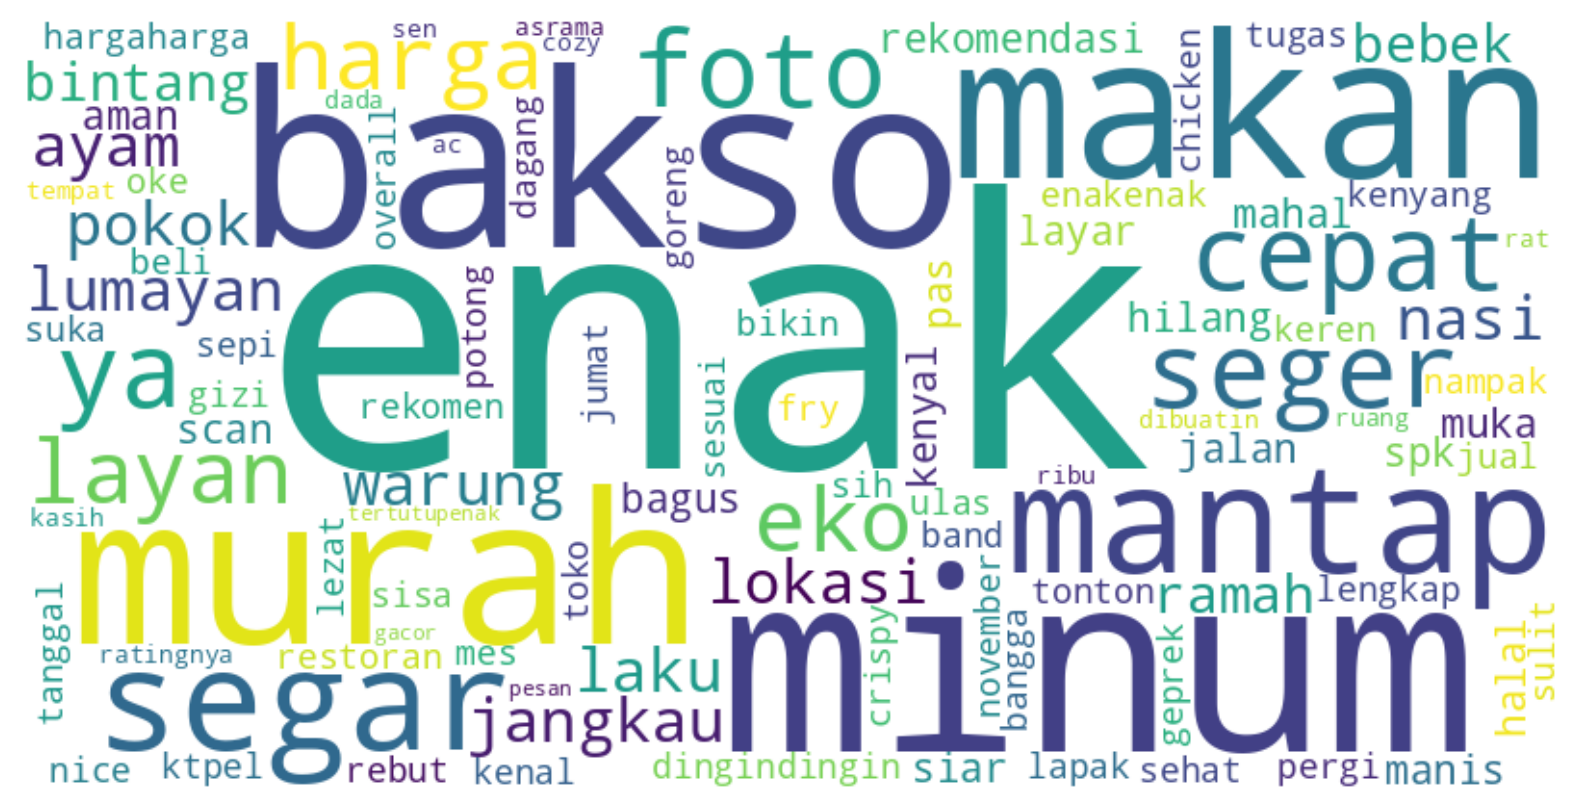

In [22]:
# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(all_user_review)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")  # Hide axis
plt.show()

In [23]:
halal_mask = np.array(Image.open('/content/drive/MyDrive/ITS RESEARCH/HALAL_ITS/2024 RGBI SIAR Halal/WordCloud/Halal_Indonesia.png'))
halal_mask

array([[[  0,   0,   0,   0],
        [  0,   0,   0,   0],
        [  0,   0,   0,   0],
        ...,
        [  0,   0,   0,   0],
        [  0,   0,   0,   0],
        [  0,   0,   0,   0]],

       [[  0,   0,   0,   0],
        [  0,   0,   0,   0],
        [  0,   0,   0,   0],
        ...,
        [  0,   0,   0,   0],
        [  0,   0,   0,   0],
        [  0,   0,   0,   0]],

       [[  0,   0,   0,   0],
        [  0,   0,   0,   0],
        [  0,   0,   0,   0],
        ...,
        [  0,   0,   0,   0],
        [  0,   0,   0,   0],
        [  0,   0,   0,   0]],

       ...,

       [[  0,   0,   0,   0],
        [ 85,   0,  85,   3],
        [101,  38, 114, 255],
        ...,
        [  0,   0,   0,   0],
        [  0,   0,   0,   0],
        [  0,   0,   0,   0]],

       [[  0,   0,   0,   0],
        [  0,   0,   0,   1],
        [102,  38, 113, 115],
        ...,
        [  0,   0,   0,   0],
        [  0,   0,   0,   0],
        [  0,   0,   0,   0]],

       [[  0

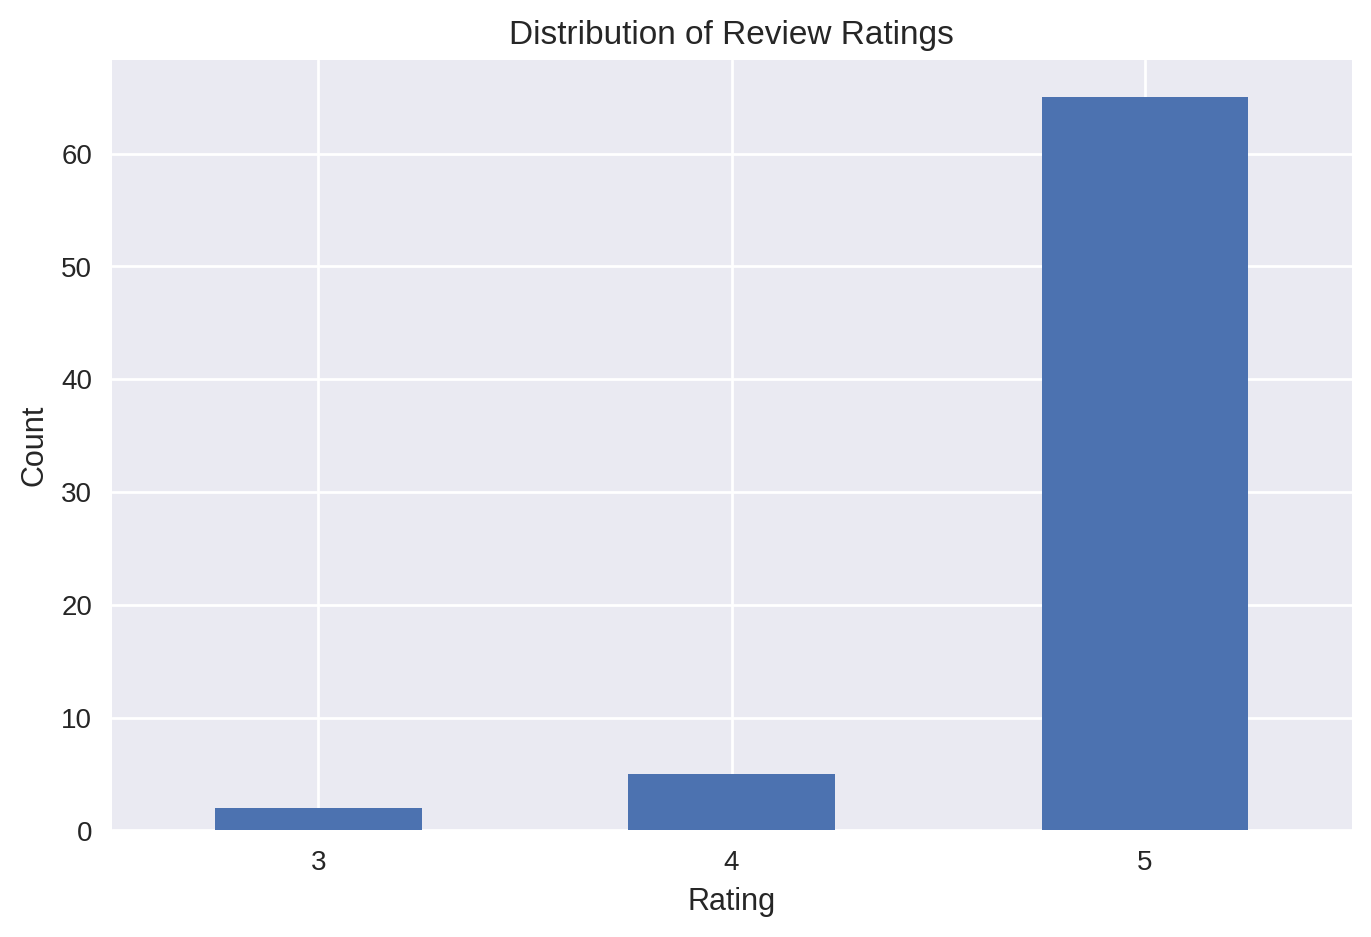

In [24]:
import matplotlib.pyplot as plt

# Plot the distribution of review ratings
plt.figure(figsize=(8, 5))
df_review_moneyspent['rating'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Review Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [25]:
!pip install -q transformers

In [26]:
#Creating polarity on the column: content (review from the apps) using TextBlob
#Read https://textblob.readthedocs.io/en/dev/quickstart.html

from textblob import TextBlob
df_review_moneyspent['sentiment_polarity'] = df_review_moneyspent['cleaned_review'].apply(lambda x: TextBlob(x).polarity)
df_review_moneyspent['sentiment_subjective'] = df_review_moneyspent['cleaned_review'].apply(lambda x: TextBlob(x).subjectivity)

In [27]:
df_review_moneyspent

,no,money_spent,username,msme,review,batas_bawah,batas_atas,median,rating,cleaned_review,sentiment_polarity,sentiment_subjective
0,1,0-25000,Ilungg,Bakso Eko,tidak ada transcript,0,25000,12500,5,,0.0,0.00
1,2,0-25000,Fareldanendraa,Bakso Eko,baksonya enak,0,25000,12500,5,bakso enak,0.0,0.00
2,3,0-25000,irfanalmizan,Bakso Eko,baksonya enak abis,0,25000,12500,5,bakso enak,0.0,0.00
3,4,0-25000,ryanadiputrapratama,Bakso Eko,tidak ada transcript,0,25000,12500,5,,0.0,0.00
4,5,0-25000,dwmhr,Bakso Eko,baksonya sangat enak,0,25000,12500,5,bakso enak,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...
67,68,0-25000,rajen270_,Bakso Pak Parlin,sangat enak,0,25000,12500,5,enak,0.0,0.00
68,69,0-25000,AdityaIyan,Bebek Goreng Mesra Surabaya,"Ya disini, masih dibuatin bebeknya, kemungkinan rasanya enak ya, saya disini pesen dada, harganya 25 ribu, tempatnya sangat cozy, ada ac, ruangannya tertutup,enak lah pokoknya.",0,25000,12500,4,ya dibuatin bebek enak ya sen dada 25 ribu tempat cozy ac ruang tertutupenak pokok,-0.2,0.75
69,70,0-25000,zafira271,Bebek Goreng Mesra Surabaya,jadi di sini saya pesan bebek,0,25000,12500,5,pesan bebek,0.0,0.00
70,71,76000-100000,Sirund,Diva Cookies,pelayanan cepat dan ramah,76000,100000,88000,5,layan cepat ramah,0.0,0.00


In [28]:
df_review_moneyspent.to_csv('out==aftersentiment.csv', index=False)

In [29]:
df_review_moneyspent.loc[:,["msme","username","cleaned_review","rating","sentiment_polarity", "sentiment_subjective"]]

,msme,username,cleaned_review,rating,sentiment_polarity,sentiment_subjective
0,Bakso Eko,Ilungg,,5,0.0,0.00
1,Bakso Eko,Fareldanendraa,bakso enak,5,0.0,0.00
2,Bakso Eko,irfanalmizan,bakso enak,5,0.0,0.00
3,Bakso Eko,ryanadiputrapratama,,5,0.0,0.00
4,Bakso Eko,dwmhr,bakso enak,5,0.0,0.00
...,...,...,...,...,...,...
67,Bakso Pak Parlin,rajen270_,enak,5,0.0,0.00
68,Bebek Goreng Mesra Surabaya,AdityaIyan,ya dibuatin bebek enak ya sen dada 25 ribu tempat cozy ac ruang tertutupenak pokok,4,-0.2,0.75
69,Bebek Goreng Mesra Surabaya,zafira271,pesan bebek,5,0.0,0.00
70,Diva Cookies,Sirund,layan cepat ramah,5,0.0,0.00


In [30]:
df_review_moneyspent.head()

,no,money_spent,username,msme,review,batas_bawah,batas_atas,median,rating,cleaned_review,sentiment_polarity,sentiment_subjective
0,1,0-25000,Ilungg,Bakso Eko,tidak ada transcript,0,25000,12500,5,,0.0,0.0
1,2,0-25000,Fareldanendraa,Bakso Eko,baksonya enak,0,25000,12500,5,bakso enak,0.0,0.0
2,3,0-25000,irfanalmizan,Bakso Eko,baksonya enak abis,0,25000,12500,5,bakso enak,0.0,0.0
3,4,0-25000,ryanadiputrapratama,Bakso Eko,tidak ada transcript,0,25000,12500,5,,0.0,0.0
4,5,0-25000,dwmhr,Bakso Eko,baksonya sangat enak,0,25000,12500,5,bakso enak,0.0,0.0


In [31]:
# Group by 'umkm_id' and calculate the mean sentiment polarity and subjectivity
grouped_sentiment_by_umkm = df_review_moneyspent.groupby('msme')[['sentiment_polarity', 'sentiment_subjective']].mean()

# Instead of using ace_tools, use the following to display the DataFrame:
print("Average Sentiment by MSMEs:")
print(grouped_sentiment_by_umkm)

# Or, for a more interactive display in a Jupyter Notebook:
display(grouped_sentiment_by_umkm)

Average Sentiment by MSMEs:
                                       sentiment_polarity  \
msme                                                        
Bakso Eko                                        0.000000   
Bakso Pak Parlin                                 0.000000   
Bebek Goreng Mesra Surabaya                     -0.066667   
Diva Cookies                                     0.000000   
Drink House                                      0.000000   
Es Coklat Mantap                                 0.000000   
Kantin Asrama Bu Geprek                          0.000000   
Kedai Minuman Asrama                             0.000000   
Kress Nyuss Fried Chicken                       -0.200000   
Mak Nun (Kafetaria Informatika)                  0.000000   
NLH Snack Ringan                                 0.000000   
Pempek Berlian                                   0.000000   
Pentol Petarung                                  0.200000   
Sambelan Cak Dayat                               0.000000

,sentiment_polarity,sentiment_subjective
msme,,
Bakso Eko,0.000000,0.000000
Bakso Pak Parlin,0.000000,0.000000
Bebek Goreng Mesra Surabaya,-0.066667,0.250000
Diva Cookies,0.000000,0.000000
Drink House,0.000000,0.000000
Es Coklat Mantap,0.000000,0.000000
Kantin Asrama Bu Geprek,0.000000,0.000000
Kedai Minuman Asrama,0.000000,0.000000
Kress Nyuss Fried Chicken,-0.200000,0.316667


In [32]:
# Import required library
import pandas as pd

# Ensure df_review_moneyspent exists
if 'df_review_moneyspent' in locals():
    # Group by UMKM and calculate required metrics
    grouped_df = df_review_moneyspent.groupby("msme").agg(
        Number_of_Visits=("username", "count"),  # Count unique users as visits
        Number_of_Feedbacks=("review", "count"),  # Count total reviews
        Average_Rating=("rating", "mean"),  # Average rating
        Average_Spend=("median", "mean"),  # Average spend (median spend column)
        Sentiment=("sentiment_polarity", "mean")  # Average sentiment polarity
    ).reset_index()

    # Display the grouped data
    from IPython.display import display
    display(grouped_df)
else:
    print("The DataFrame 'df_review_moneyspent' is not found in the environment.")


,msme,Number_of_Visits,Number_of_Feedbacks,Average_Rating,Average_Spend,Sentiment
0,Bakso Eko,11,11,4.818182,12500.0,0.000000
1,Bakso Pak Parlin,9,9,5.000000,12500.0,0.000000
2,Bebek Goreng Mesra Surabaya,3,3,4.000000,21000.0,-0.066667
3,Diva Cookies,8,8,5.000000,34562.5,0.000000
4,Drink House,14,14,4.928571,12500.0,0.000000
5,Es Coklat Mantap,2,2,5.000000,12500.0,0.000000
6,Kantin Asrama Bu Geprek,3,3,5.000000,12500.0,0.000000
7,Kedai Minuman Asrama,6,6,5.000000,12500.0,0.000000
8,Kress Nyuss Fried Chicken,3,3,4.666667,12500.0,-0.200000
9,Mak Nun (Kafetaria Informatika),2,2,5.000000,12500.0,0.000000


In [33]:
# Sort the DataFrame by 'Number_of_Visits' in descending order
grouped_df_sorted = grouped_df.sort_values(by='Number_of_Visits', ascending=False)

# Display the sorted DataFrame
display(grouped_df_sorted)


,msme,Number_of_Visits,Number_of_Feedbacks,Average_Rating,Average_Spend,Sentiment
4,Drink House,14,14,4.928571,12500.0,0.000000
0,Bakso Eko,11,11,4.818182,12500.0,0.000000
1,Bakso Pak Parlin,9,9,5.000000,12500.0,0.000000
3,Diva Cookies,8,8,5.000000,34562.5,0.000000
7,Kedai Minuman Asrama,6,6,5.000000,12500.0,0.000000
2,Bebek Goreng Mesra Surabaya,3,3,4.000000,21000.0,-0.066667
8,Kress Nyuss Fried Chicken,3,3,4.666667,12500.0,-0.200000
6,Kantin Asrama Bu Geprek,3,3,5.000000,12500.0,0.000000
12,Pentol Petarung,3,3,4.666667,12500.0,0.200000
5,Es Coklat Mantap,2,2,5.000000,12500.0,0.000000


## Exploratory Data Analysis

In [34]:
df_review_moneyspent.to_csv('outgroupedbyumkmsentiment.csv', index=False)

In [35]:
# Create a mapping of unique umkm_id values to numbers 1 to 10
umkm_id_mapping = {umkm_id: idx+1 for idx, umkm_id in enumerate(df_review_moneyspent['msme'].unique())}

# Replace umkm_id values in the dataframe with the mapped numbers
df_review_moneyspent['msme'] = df_review_moneyspent['msme'].map(umkm_id_mapping)

# Display the updated dataframe with numerical umkm_id
df_review_moneyspent_selected = df_review_moneyspent.loc[:, ["msme","rating", "cleaned_review","sentiment_polarity", "sentiment_subjective"]]
display(df_review_moneyspent_selected)

,msme,rating,cleaned_review,sentiment_polarity,sentiment_subjective
0,1,5,,0.0,0.00
1,1,5,bakso enak,0.0,0.00
2,1,5,bakso enak,0.0,0.00
3,1,5,,0.0,0.00
4,1,5,bakso enak,0.0,0.00
...,...,...,...,...,...
67,2,5,enak,0.0,0.00
68,17,4,ya dibuatin bebek enak ya sen dada 25 ribu tempat cozy ac ruang tertutupenak pokok,-0.2,0.75
69,17,5,pesan bebek,0.0,0.00
70,12,5,layan cepat ramah,0.0,0.00


In [36]:
# Add custom stopwords
custom_stopwords = {'transcript', 'iya', 'harganya'}  # Example additional words
custom_stopwords2 = ["untuk", "sangat", "dan", "ya", "tidak", "haus", "aplikasi", "ini", "ada", "transcript", "5", "abis", "bentuk", "sekali", "dengan", "cukup", "sedikit", "tes", "nya", "Eko", "akan", "beri", "nilai", "tetapi", "aku", "sering", "iya", "cuma", "di", "yang", "saya", "banget", "sudah", "disini", "sini", "sepertinya", "masih", "juga", "tinggal"]

# Merge with existing stopwords
indonesian_stopwords.update(custom_stopwords)
indonesian_stopwords.update(custom_stopwords2)

print("Updated stopwords:", indonesian_stopwords)

Updated stopwords: {'rasa', 'makanya', 'mengingat', 'se', 'apa', 'begitu', 'kebetulan', 'berikan', 'dimulai', 'ketika', 'lalu', 'menanyakan', 'merasa', 'usai', 'mempergunakan', 'diucapkannya', 'pentingnya', 'bagai', 'kata', 'amat', 'berlalu', 'seketika', 'termasuk', 'mirip', 'hari', 'sesudahnya', 'dilalui', 'sebesar', 'betulkah', 'aplikasi', 'empat', 'jangankan', 'apalagi', 'kiranya', 'bermula', 'segala', 'bertutur', 'agaknya', 'antaranya', 'melalui', 'sebaiknya', 'sebuah', 'sebutlah', 'siapakah', 'inginkah', 'malahan', 'pasti', 'setibanya', 'makin', 'tadi', 'diingatkan', 'sedemikian', 'mengerjakan', 'lebih', 'nyaris', 'beginikah', 'kepadanya', 'sesama', 'biasa', 'enggaknya', 'ibaratkan', 'lima', 'semata', 'kemungkinannya', 'jadi', 'mau', 'memang', 'dijawab', 'harus', 'kala', 'dimintai', 'jawab', 'perlunya', 'banyak', 'berlangsung', 'saya', 'tepat', 'terjadinya', 'masih', 'transcript', 'sewaktu', 'selamanya', 'terhadap', 'boleh', 'hanyalah', 'tuturnya', 'diungkapkan', 'disampaikan', 's

In [37]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.stem import WordNetLemmatizer

# Assuming 'df_review_moneyspent' and 'indonesian_stopwords' are defined
# Add custom stopwords
custom_stopwords = {'transcript', 'iya', 'harganya'}  # Example additional words
custom_stopwords2 = ["untuk", "sangat", "dan", "ya", "tidak", "haus", "aplikasi", "ini", "ada", "transcript", "5", "abis", "bentuk", "sekali", "dengan", "cukup", "sedikit", "tes", "nya", "Eko", "akan", "beri", "nilai", "tetapi", "aku", "sering", "iya", "cuma", "di", "yang", "saya", "banget", "sudah", "disini", "sini", "sepertinya", "masih", "juga", "tinggal"]

# Merge with existing stopwords
indonesian_stopwords.update(custom_stopwords)
indonesian_stopwords.update(custom_stopwords2)

# Create stemmer and lemmatizer objects
factory = StemmerFactory()
stemmer = factory.create_stemmer()
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Case folding
    text = text.lower()
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Stemming
    text = stemmer.stem(text)
    # Remove stopwords
    words = text.split()
    filtered_words = [word for word in words if word not in indonesian_stopwords]
    text = ' '.join(filtered_words)
    return text


# Apply the preprocessing function to the 'cleaned_review' column
df_review_moneyspent['cleaned_review'] = df_review_moneyspent['cleaned_review'].apply(preprocess_text)

# Display the updated DataFrame
print(df_review_moneyspent[['review', 'cleaned_review']])

                                                                                                                                                                              review  \
0                                                                                                                                                               tidak ada transcript   
1                                                                                                                                                                      baksonya enak   
2                                                                                                                                                                 baksonya enak abis   
3                                                                                                                                                               tidak ada transcript   
4                                                                               

In [38]:
# Sort the DataFrame by 'Number_of_Visits' in descending order
grouped_df_sorted = grouped_df.sort_values(by='Number_of_Visits', ascending=False)

# Display the sorted DataFrame
display(grouped_df_sorted)


,msme,Number_of_Visits,Number_of_Feedbacks,Average_Rating,Average_Spend,Sentiment
4,Drink House,14,14,4.928571,12500.0,0.000000
0,Bakso Eko,11,11,4.818182,12500.0,0.000000
1,Bakso Pak Parlin,9,9,5.000000,12500.0,0.000000
3,Diva Cookies,8,8,5.000000,34562.5,0.000000
7,Kedai Minuman Asrama,6,6,5.000000,12500.0,0.000000
2,Bebek Goreng Mesra Surabaya,3,3,4.000000,21000.0,-0.066667
8,Kress Nyuss Fried Chicken,3,3,4.666667,12500.0,-0.200000
6,Kantin Asrama Bu Geprek,3,3,5.000000,12500.0,0.000000
12,Pentol Petarung,3,3,4.666667,12500.0,0.200000
5,Es Coklat Mantap,2,2,5.000000,12500.0,0.000000


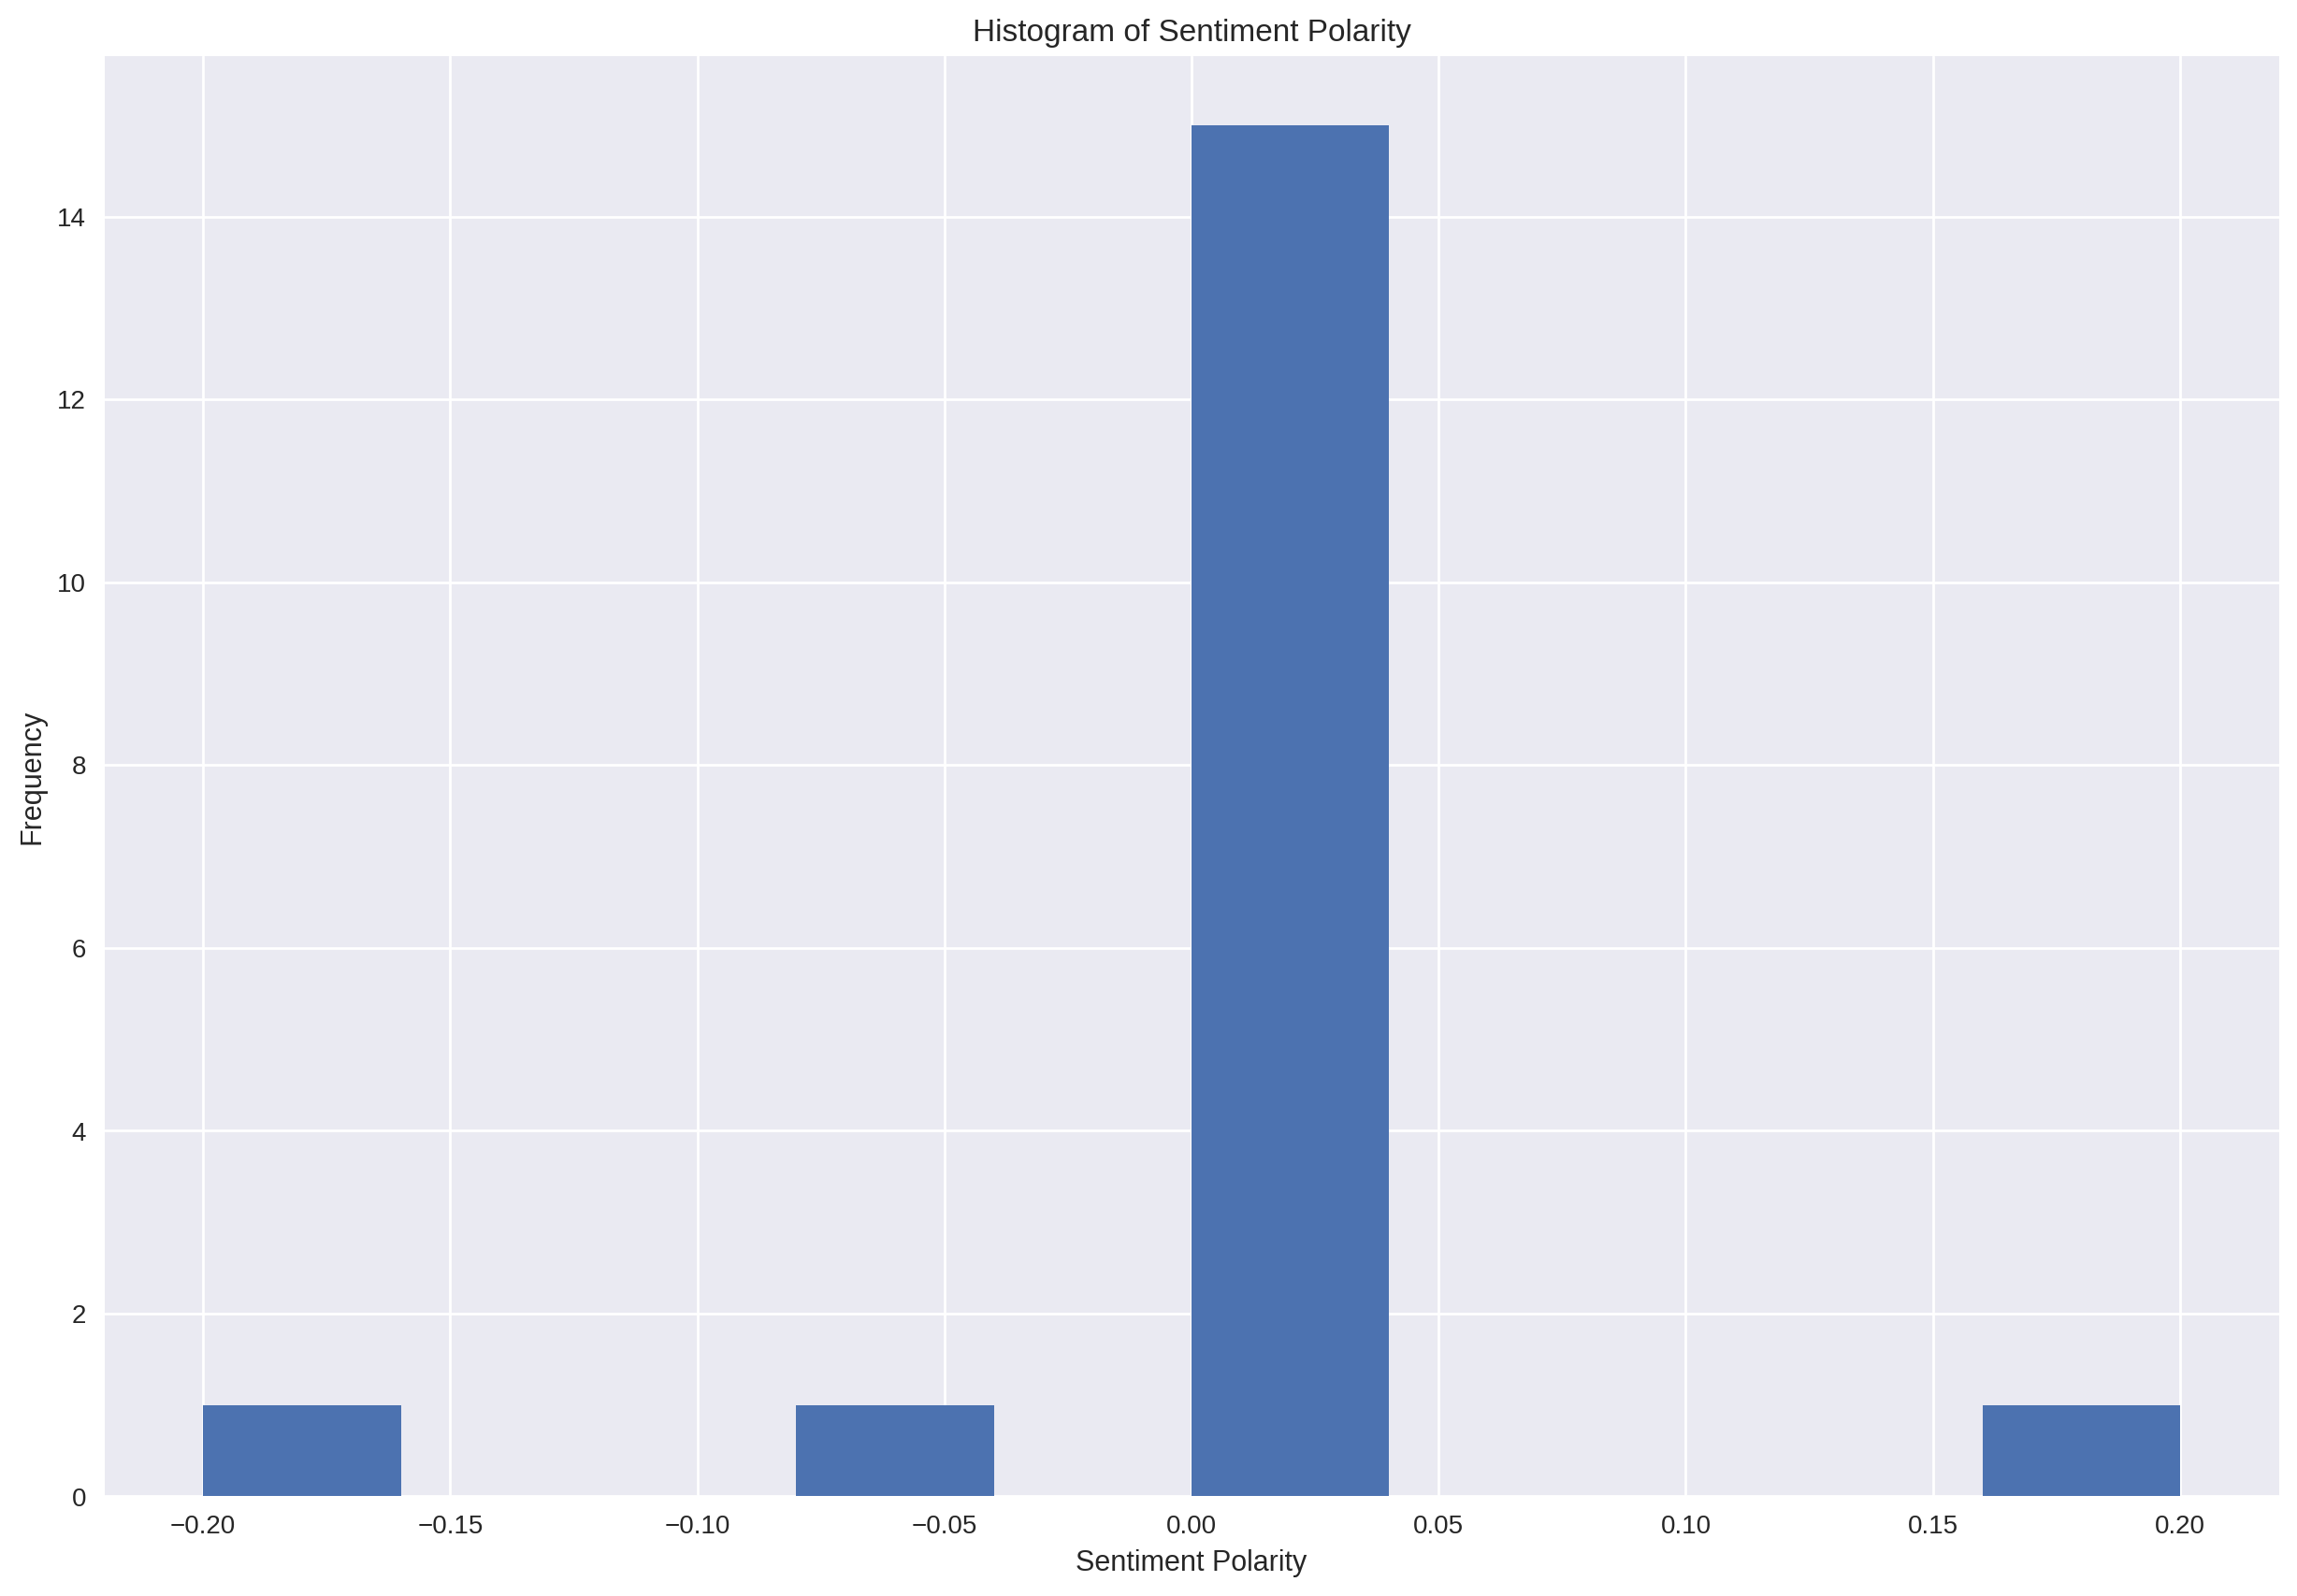

In [39]:
import matplotlib.pyplot as plt

# Create the histogram
plt.hist(grouped_sentiment_by_umkm['sentiment_polarity'], bins=10)  # Adjust the number of bins as needed

# Add labels and title
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.title('Histogram of Sentiment Polarity')

# Display the histogram
plt.show()

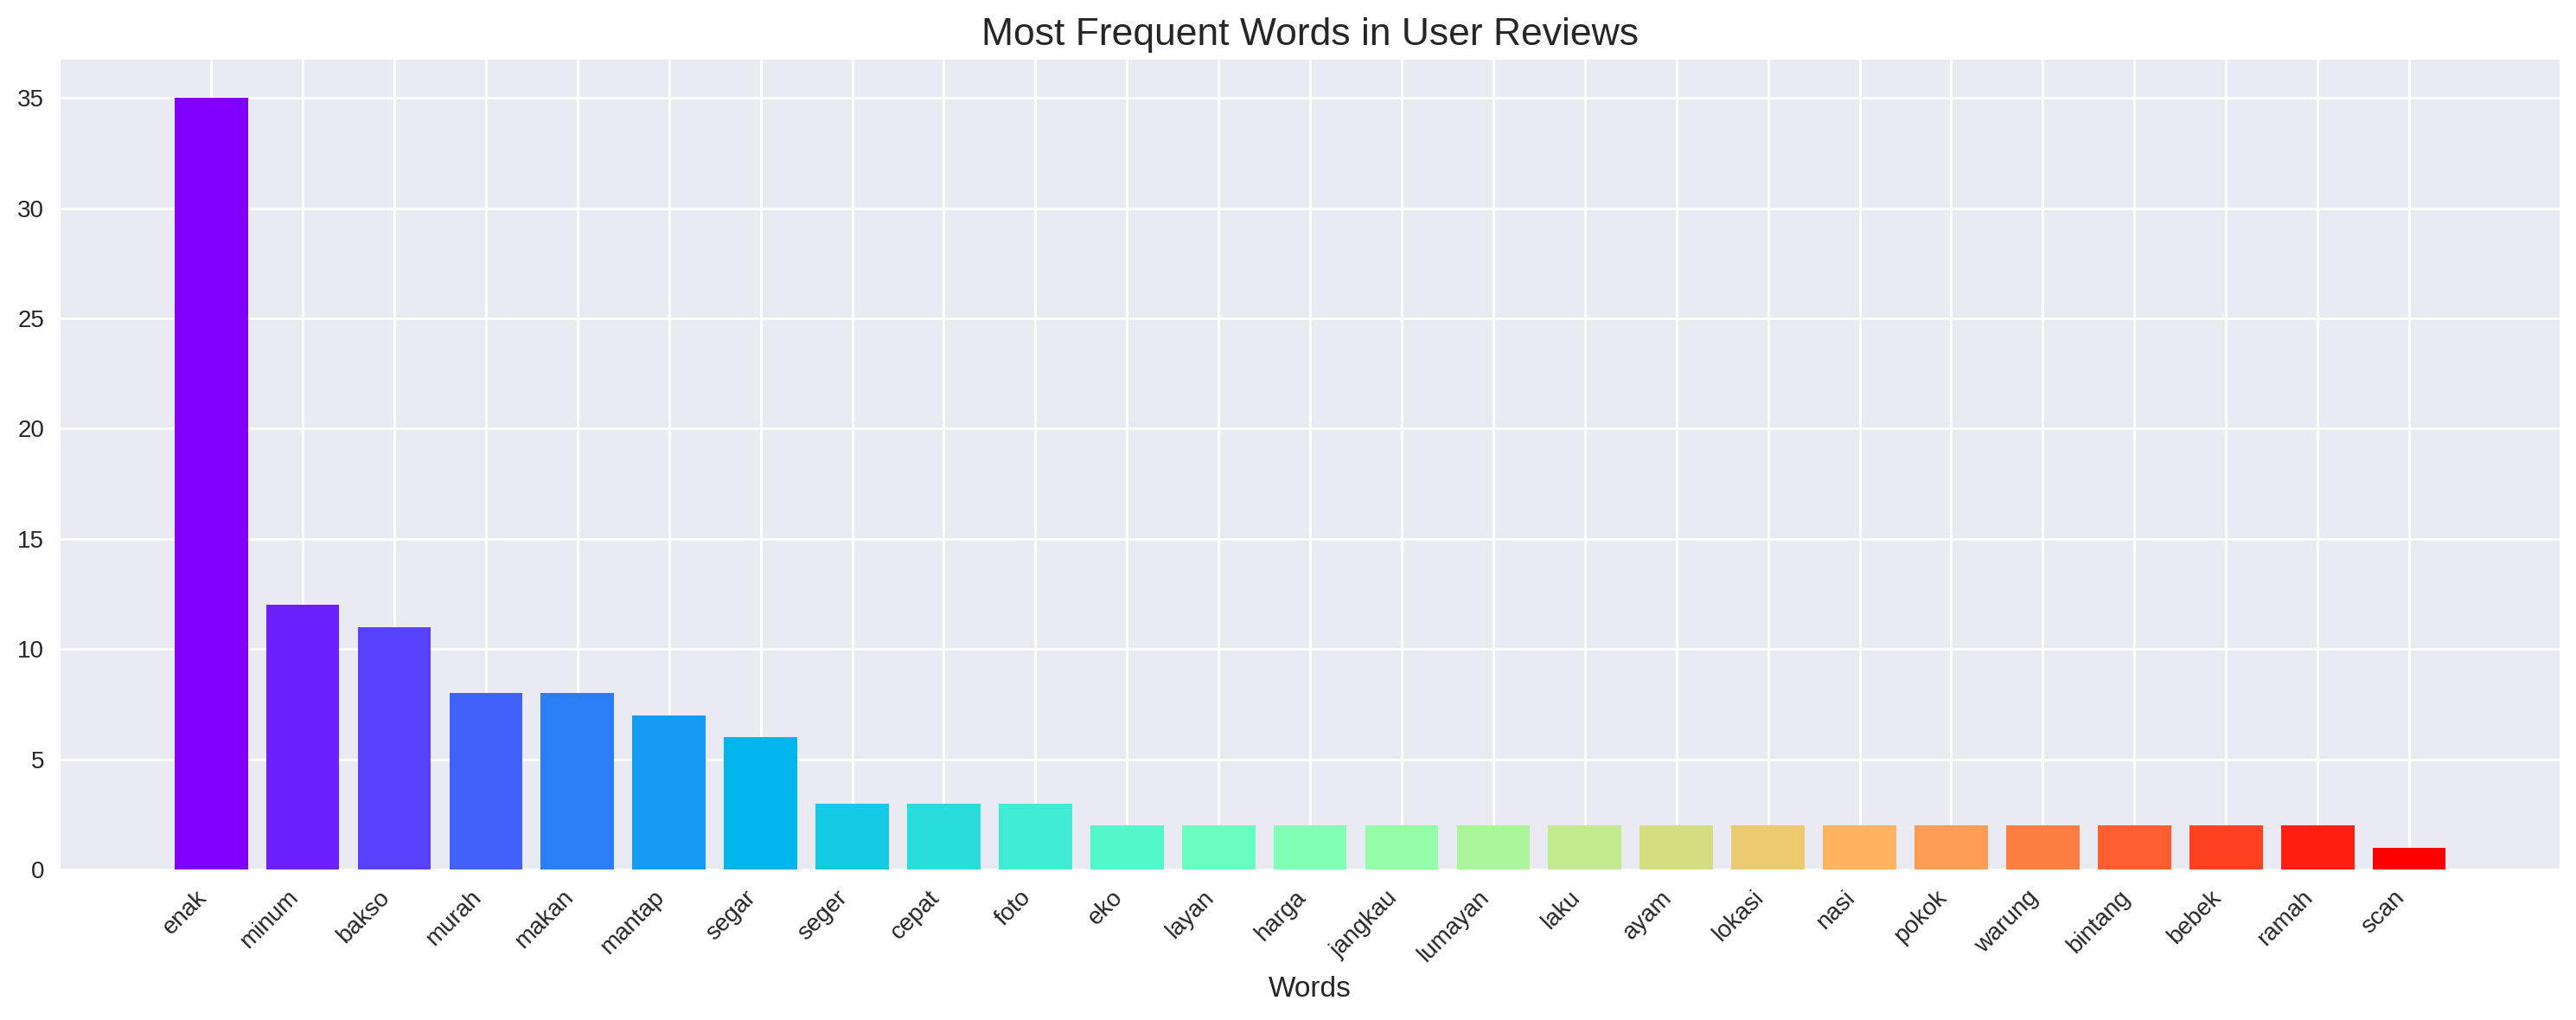

In [41]:
from collections import Counter  # Import the Counter object

# Combine all reviews into a single string
all_reviews = ' '.join(df_review_moneyspent['cleaned_review'])

# Tokenize the text and count word frequencies
word_counts = Counter(all_reviews.split())

# Get the most frequent words
most_common_words = word_counts.most_common(25)  # Adjust the number as needed

# Create a list of words and their frequencies
words, frequencies = zip(*most_common_words)

# Generate rainbow colors
colors = plt.cm.rainbow(np.linspace(0, 1, len(words)))

# Create the histogram
plt.figure(figsize=(15, 6))
plt.bar(words, frequencies, color=colors)
plt.title("Most Frequent Words in User Reviews", fontsize=16)
plt.xlabel("Words", fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping

In [42]:
df_review_moneyspent.head()

,no,money_spent,username,msme,review,batas_bawah,batas_atas,median,rating,cleaned_review,sentiment_polarity,sentiment_subjective
0,1,0-25000,Ilungg,1,tidak ada transcript,0,25000,12500,5,,0.0,0.0
1,2,0-25000,Fareldanendraa,1,baksonya enak,0,25000,12500,5,bakso enak,0.0,0.0
2,3,0-25000,irfanalmizan,1,baksonya enak abis,0,25000,12500,5,bakso enak,0.0,0.0
3,4,0-25000,ryanadiputrapratama,1,tidak ada transcript,0,25000,12500,5,,0.0,0.0
4,5,0-25000,dwmhr,1,baksonya sangat enak,0,25000,12500,5,bakso enak,0.0,0.0


## Evaluation

In [43]:
#Add a column name polarity_rating from changing the score of the review into 3 labels: Pos, Negative Neutral
df_review_moneyspent['sentiment_rating'] = df_review_moneyspent['rating'].apply(lambda x: 'Positive' if x > 3 else('Neutral' if x == 3  else 'Negative'))

In [44]:
#Add a column name polarity_rating from changing the score of the review into 3 labels: Pos, Negative Neutral
df_review_moneyspent['sentiment_rating'] = df_review_moneyspent['rating'].apply(lambda x: 'Positive' if x > 3 else('Neutral' if x == 3  else 'Negative'))

# Access the desired columns
df_review_moneyspent.loc[:,["msme","cleaned_review","rating", "sentiment_polarity", "sentiment_subjective","sentiment_rating"]]

,msme,cleaned_review,rating,sentiment_polarity,sentiment_subjective,sentiment_rating
0,1,,5,0.0,0.00,Positive
1,1,bakso enak,5,0.0,0.00,Positive
2,1,bakso enak,5,0.0,0.00,Positive
3,1,,5,0.0,0.00,Positive
4,1,bakso enak,5,0.0,0.00,Positive
...,...,...,...,...,...,...
67,2,enak,5,0.0,0.00,Positive
68,17,dibuatin bebek enak sen dada 25 ribu cozy ac ruang tertutupenak pokok,4,-0.2,0.75,Positive
69,17,pesan bebek,5,0.0,0.00,Positive
70,12,layan cepat ramah,5,0.0,0.00,Positive


In [45]:
print(df_review_moneyspent.msme.unique())
print("Lapak yang dilakukan review ada sebanyak: ", df_review_moneyspent.msme.nunique())

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18]
Lapak yang dilakukan review ada sebanyak:  18


In [46]:
# Group by 'umkm_id' and calculate the mean sentiment polarity and subjectivity
grouped_sentiment_by_umkm = df_review_moneyspent.groupby('msme')[['sentiment_polarity', 'sentiment_subjective']].mean()

In [47]:
df = df_review_moneyspent

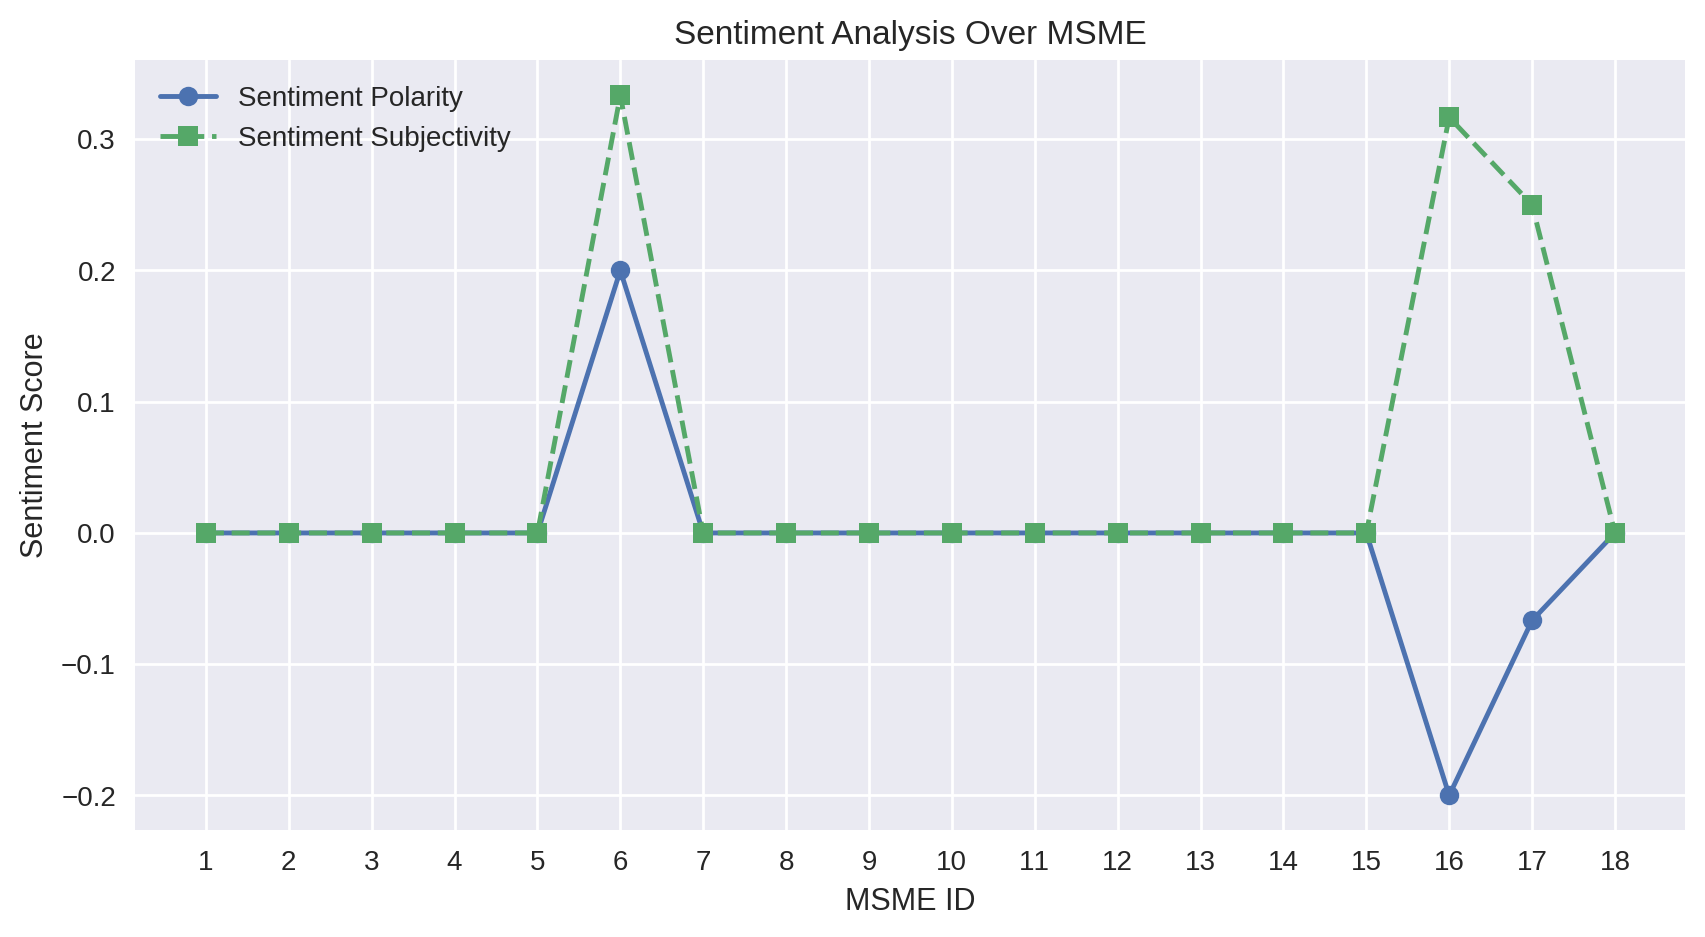

In [48]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Sample DataFrame (replace this with actual DataFrame)
data = grouped_sentiment_by_umkm

df = pd.DataFrame(data)

# Reset the index to make 'umkm' a column
df = df.reset_index() #This line was added to fix the error.

# Create a line chart
plt.figure(figsize=(10, 5))
plt.plot(df["msme"], df["sentiment_polarity"], marker="o", linestyle="-", label="Sentiment Polarity")
plt.plot(df["msme"], df["sentiment_subjective"], marker="s", linestyle="--", label="Sentiment Subjectivity")

# Labels and title
plt.xlabel("MSME ID")
plt.ylabel("Sentiment Score")
plt.title("Sentiment Analysis Over MSME")
plt.legend()
plt.grid(True)

# Ensure x-axis displays each UMKM ID
plt.xticks(df["msme"])

# Show the plot
plt.show()

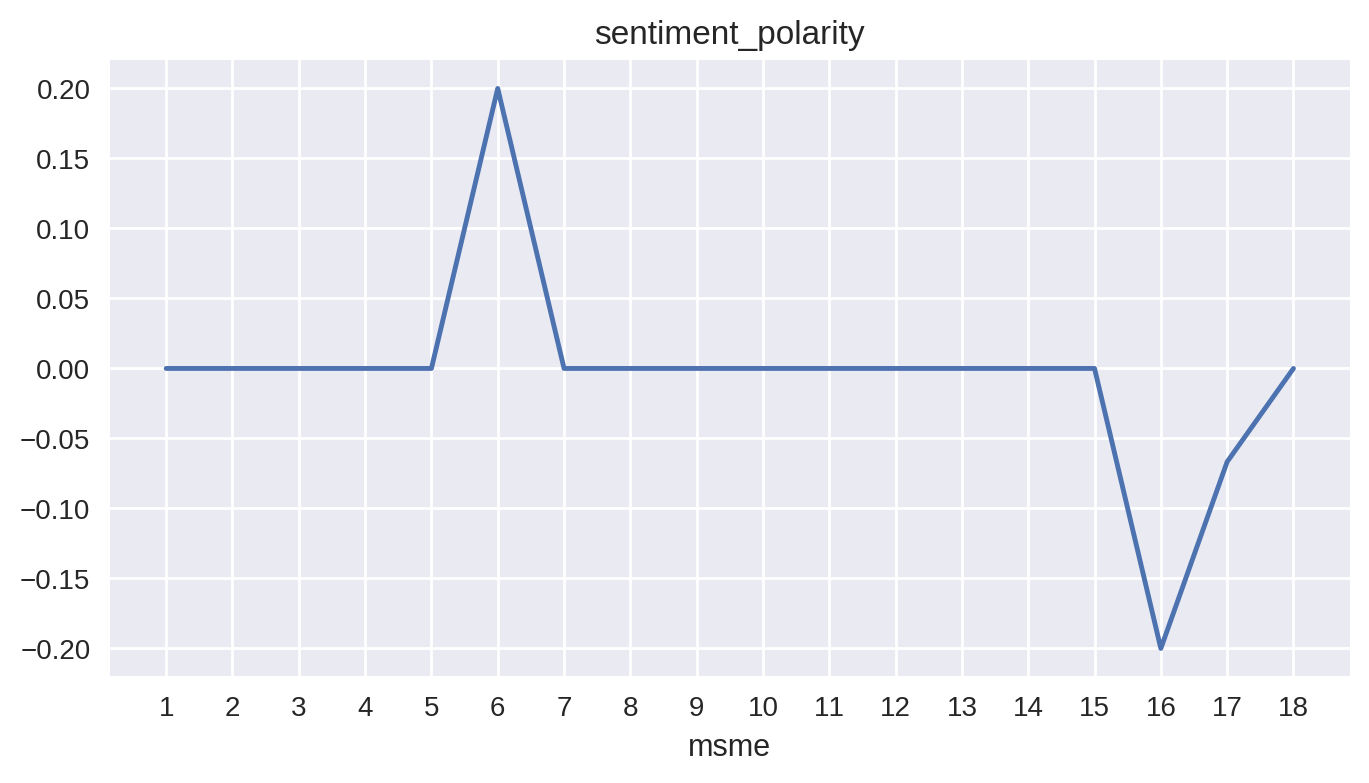

In [51]:
from matplotlib import pyplot as plt
grouped_sentiment_by_umkm['sentiment_polarity'].plot(kind='line', figsize=(8, 4), title='sentiment_polarity')

# Ensure x-axis displays each UMKM ID
plt.xticks(df["msme"])

plt.gca().spines[['top', 'right']].set_visible(False)

<Figure size 1500x1000 with 0 Axes>

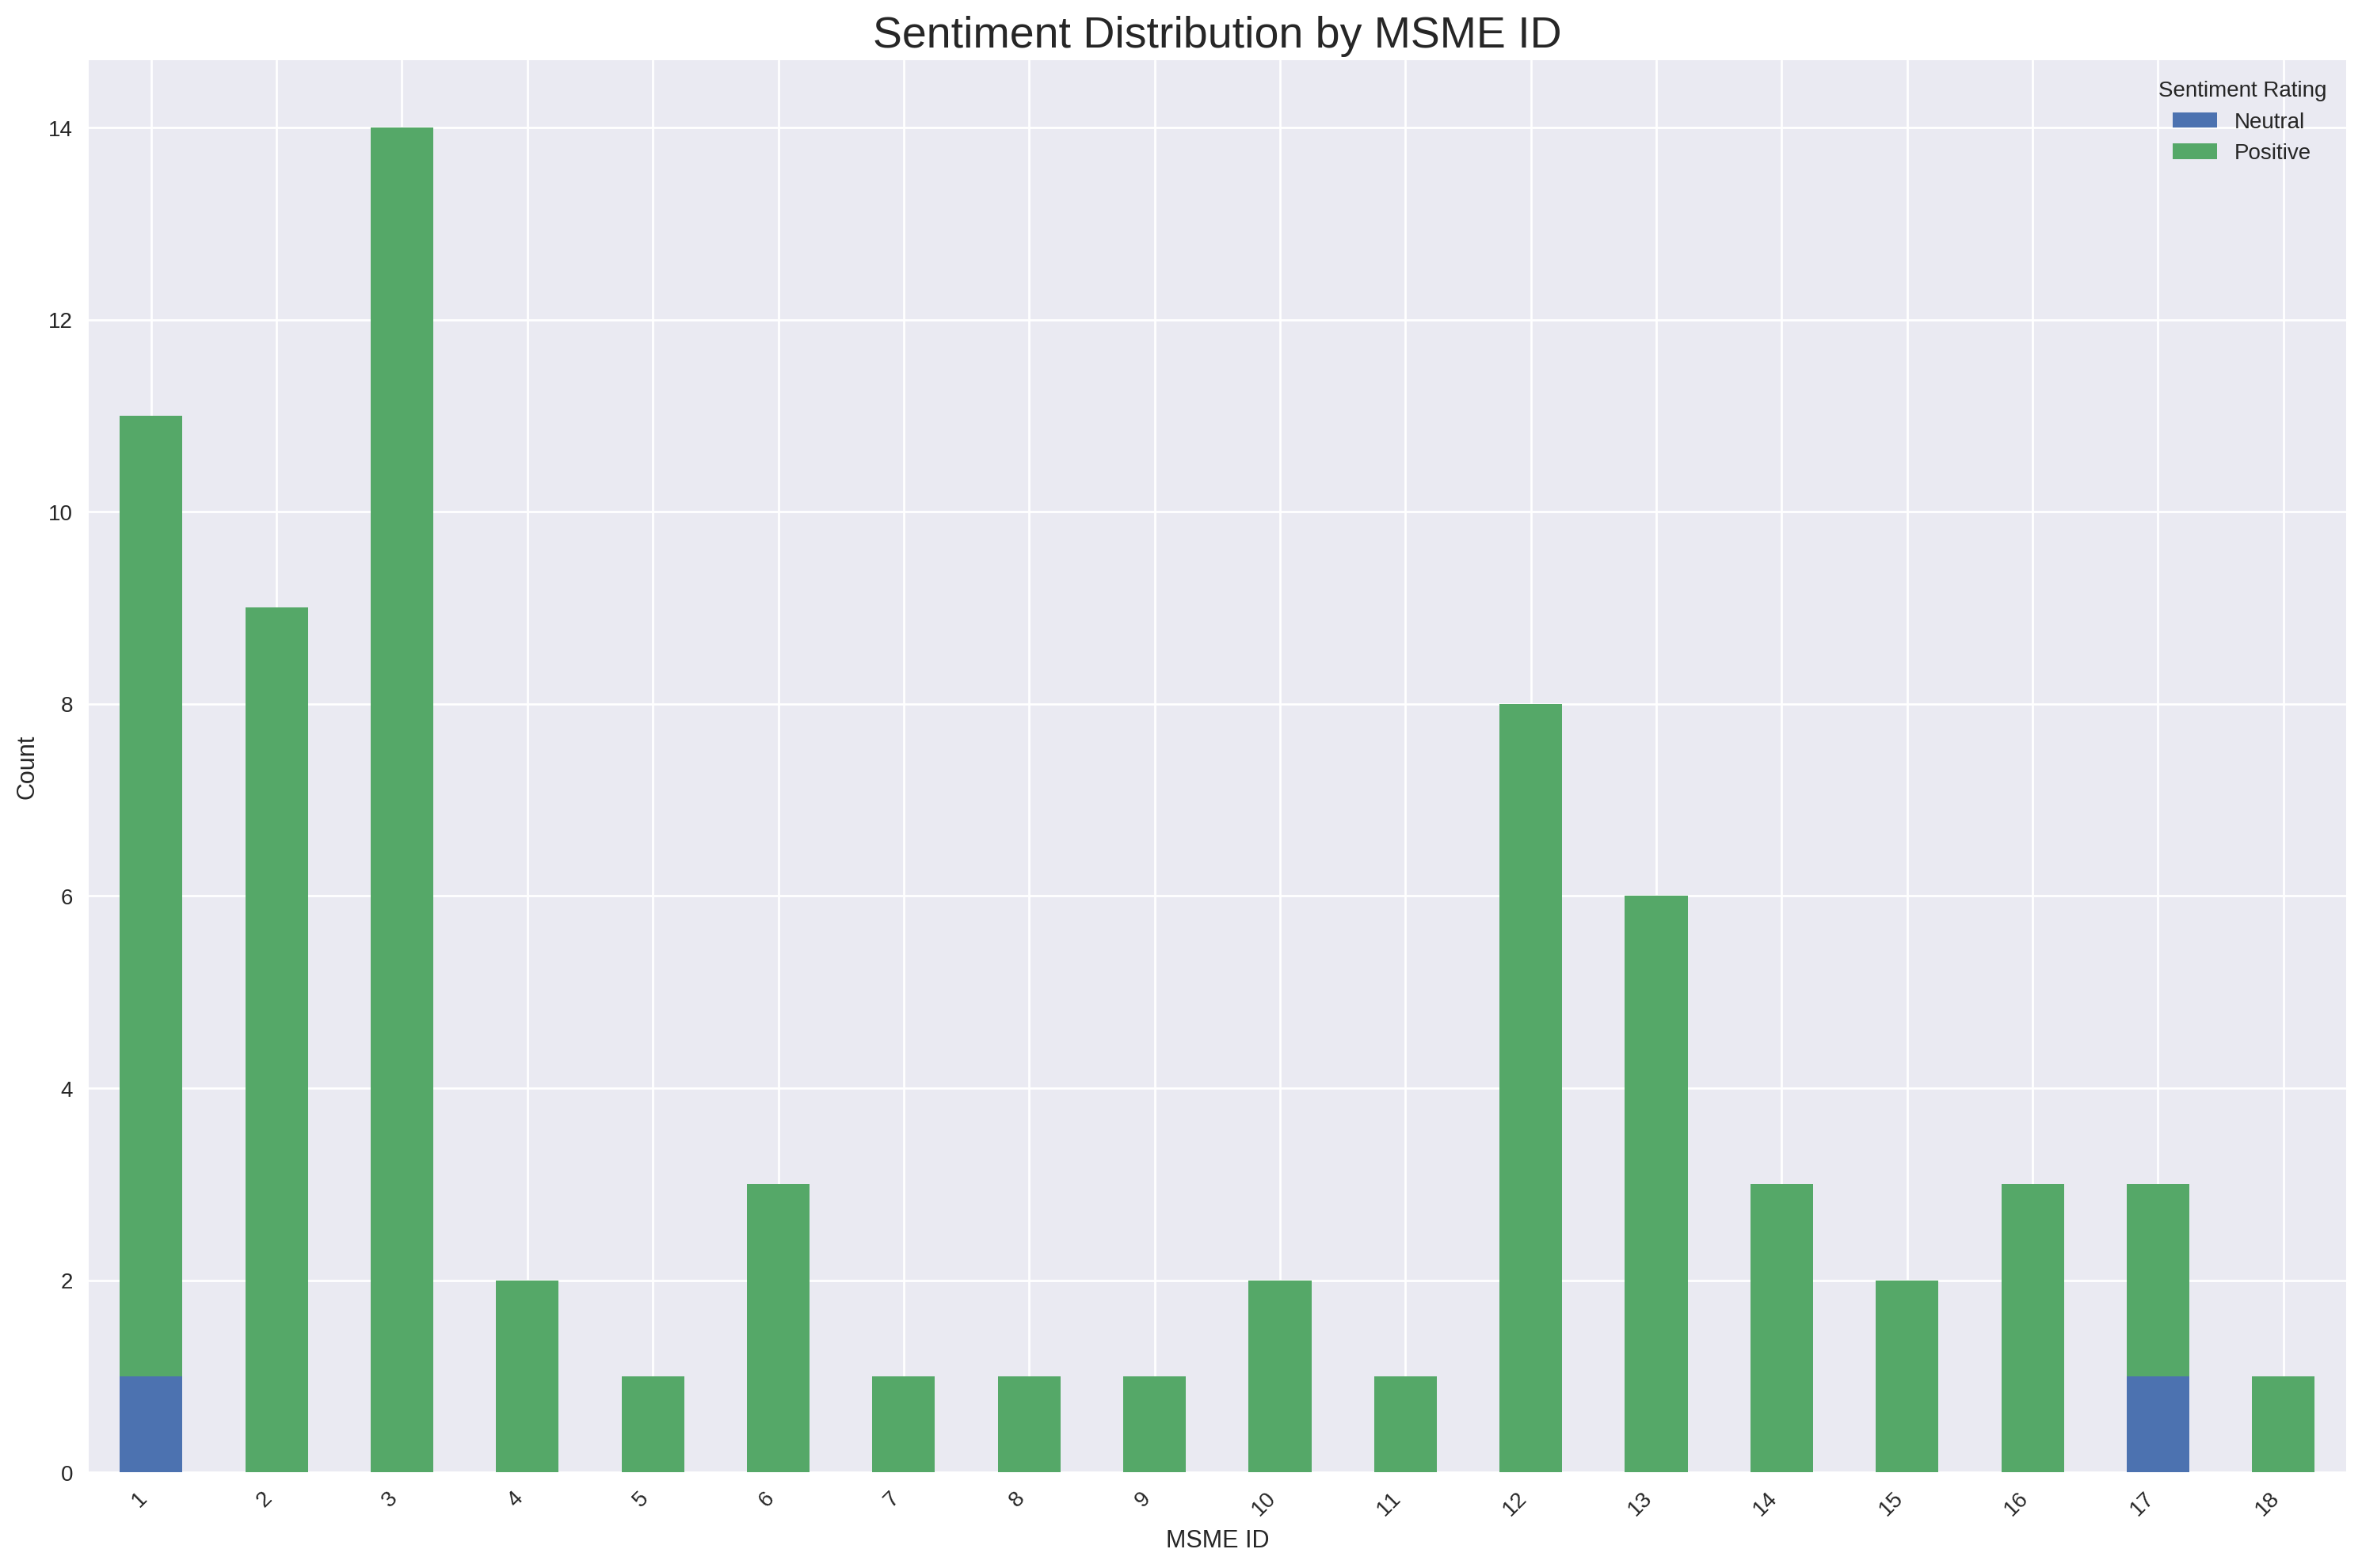

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming df_review_moneyspent_selected is your DataFrame

# Add the 'sentiment_rating' column to df_review_moneyspent_selected
df_review_moneyspent['sentiment_rating'] = df_review_moneyspent['rating'].apply(lambda x: 'Positive' if x > 3 else ('Neutral' if x == 3 else 'Negative'))

# Group by umkm_id and sentiment_rating and count occurrences
sentiment_counts = df_review_moneyspent.groupby(['msme', 'sentiment_rating'])['sentiment_rating'].count().reset_index(name='count')

# Pivot the table to have sentiment_rating as columns
sentiment_counts_pivot = sentiment_counts.pivot(index='msme', columns='sentiment_rating', values='count').fillna(0)

# Plot the data
plt.figure(figsize=(15, 10))
sentiment_counts_pivot.plot(kind='bar', stacked=True)  # Adjust colors as desired
plt.title("Sentiment Distribution by MSME ID", fontsize=20)
plt.xlabel("MSME ID")
plt.ylabel("Count")
plt.legend(title="Sentiment Rating")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels if needed
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

In [53]:
df_review_moneyspent.head()

,no,money_spent,username,msme,review,batas_bawah,batas_atas,median,rating,cleaned_review,sentiment_polarity,sentiment_subjective,sentiment_rating
0,1,0-25000,Ilungg,1,tidak ada transcript,0,25000,12500,5,,0.0,0.0,Positive
1,2,0-25000,Fareldanendraa,1,baksonya enak,0,25000,12500,5,bakso enak,0.0,0.0,Positive
2,3,0-25000,irfanalmizan,1,baksonya enak abis,0,25000,12500,5,bakso enak,0.0,0.0,Positive
3,4,0-25000,ryanadiputrapratama,1,tidak ada transcript,0,25000,12500,5,,0.0,0.0,Positive
4,5,0-25000,dwmhr,1,baksonya sangat enak,0,25000,12500,5,bakso enak,0.0,0.0,Positive
